In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("muted")

In [12]:
DATA_PATH = Path("../data/processed/double_pendulum_processed.csv")
PLOT_DIR = Path("../plots")
RESULTS_DIR = Path("../results")
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

RESULTS_PATH = RESULTS_DIR / "energy_stats.csv"

In [13]:
if not DATA_PATH.exists():
    raise FileNotFoundError(f"❌ Processed data not found at: {DATA_PATH}")

df = pd.read_csv(DATA_PATH)
df.head()

,time,theta1,theta2,omega1,omega2,x1,y1,x2,y2,KE,PE,TME
0,0.00,2.094395,-0.174533,0.000000,0.000000,0.866025,0.500000,0.692377,-0.484808,0.000000,29.579036,29.579036
1,0.01,2.093894,-0.174296,-0.100185,0.047317,0.866276,0.499566,0.692861,-0.485283,0.014201,29.570121,29.584322
2,0.02,2.092391,-0.173588,-0.200410,0.094385,0.867026,0.498264,0.694308,-0.486708,0.056734,29.543363,29.600098
3,0.03,2.089886,-0.172411,-0.300715,0.140950,0.868271,0.496090,0.696713,-0.489084,0.127392,29.498728,29.626120
4,0.04,2.086377,-0.170773,-0.401144,0.186767,0.870007,0.493040,0.700063,-0.492414,0.225836,29.436146,29.661983


In [14]:
g = 9.81
L1 = 1.0
L2 = 1.0
m1 = 1.0
m2 = 1.0

In [15]:
theta1 = df["theta1"].values
theta2 = df["theta2"].values
omega1 = df["omega1"].values
omega2 = df["omega2"].values

In [16]:
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

vx1 = L1 * omega1 * np.cos(theta1)
vy1 = L1 * omega1 * np.sin(theta1)
vx2 = vx1 + L2 * omega2 * np.cos(theta2)
vy2 = vy1 + L2 * omega2 * np.sin(theta2)

In [17]:
KE1 = 0.5 * m1 * (vx1**2 + vy1**2)
KE2 = 0.5 * m2 * (vx2**2 + vy2**2)
KE_total = KE1 + KE2

PE1 = m1 * g * (y1 + L1 + L2)
PE2 = m2 * g * (y2 + L1 + L2)
PE_total = PE1 + PE2

TME = KE_total + PE_total

In [18]:
df["KE"] = KE_total
df["PE"] = PE_total
df["TME"] = TME

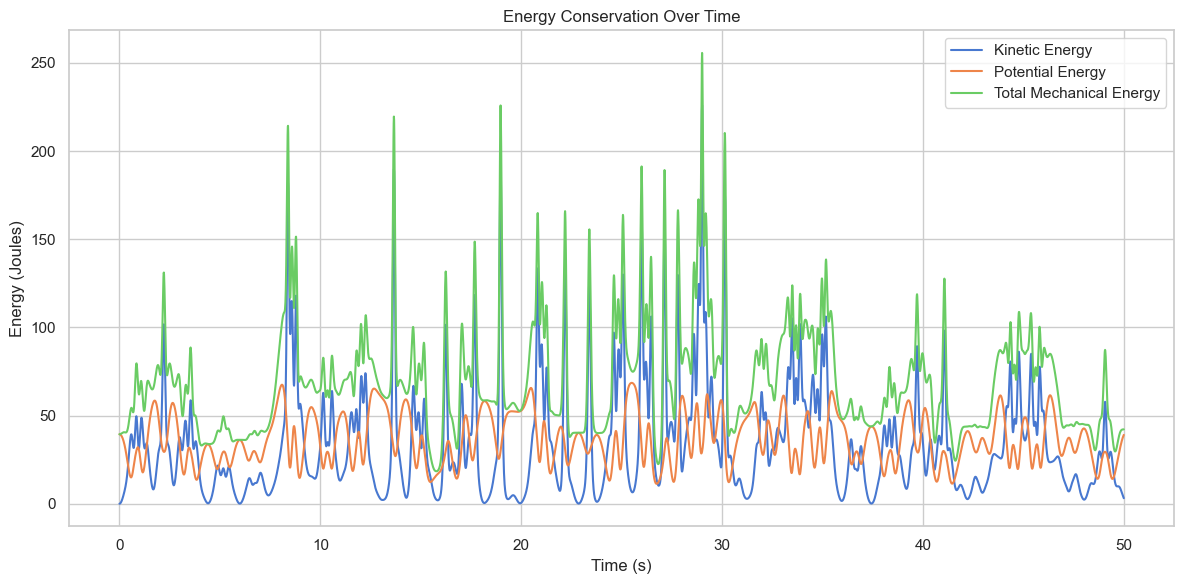

✅ Saved plot: ..\plots\energy_conservation.png


In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
t = df["time"]

sns.lineplot(x=t, y=df["KE"], label="Kinetic Energy", ax=ax)
sns.lineplot(x=t, y=df["PE"], label="Potential Energy", ax=ax)
sns.lineplot(x=t, y=df["TME"], label="Total Mechanical Energy", ax=ax)

ax.set_title("Energy Conservation Over Time")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Energy (Joules)")
plt.tight_layout()

energy_plot = PLOT_DIR / "energy_conservation.png"
plt.savefig(energy_plot, dpi=300)
plt.show()

print(f"✅ Saved plot: {energy_plot}")

In [20]:
energy_stats = {
    "KE_mean": np.mean(KE_total),
    "PE_mean": np.mean(PE_total),
    "TME_mean": np.mean(TME),
    "TME_std": np.std(TME)
}

pd.DataFrame([energy_stats]).to_csv(RESULTS_PATH, index=False)
print(f"✅ Saved stats: {RESULTS_PATH}")

✅ Saved stats: ..\results\energy_stats.csv
